# Korea Global Trade Analysis

Try to figure out korea's global trade market and visualize the trade/

## Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
%matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')
mpl.rc('font', family='AppleGothic')
mpl.rc('axes', unicode_minus=False)

# plotly
import chart_studio.plotly as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go



In [2]:
df=pd.read_csv('data/commodity_trade_statistics_data.csv', low_memory=False)

In [3]:
kr_df = df[df["country_or_area"] == "Rep. of Korea" ]
kr_df.head()

,country_or_area,year,comm_code,commodity,flow,trade_usd,weight_kg,quantity_name,quantity,category
40416,Rep. of Korea,2016,010111,"Horses, live pure-bred breeding",Import,6660426,93941.0,No Quantity,NaN,01_live_animals
40417,Rep. of Korea,2016,010119,"Horses, live except pure-bred breeding",Export,113145,2600.0,No Quantity,NaN,01_live_animals
40418,Rep. of Korea,2016,010119,"Horses, live except pure-bred breeding",Import,18517169,324987.0,Number of items,1212.0,01_live_animals
40419,Rep. of Korea,2016,010210,"Bovine animals, live pure-bred breeding",Import,902668,4850.0,Number of items,437.0,01_live_animals
40420,Rep. of Korea,2016,010310,"Swine, live pure-bred breeding",Import,5454100,288108.0,No Quantity,NaN,01_live_animals


### Import and Export in Korea 

In [4]:
w_q =kr_df.groupby(['year'], as_index=True)['weight_kg', 'quantity'].agg('sum')



Text(0.5, 1.0, 'Korea Global Trade Volume')

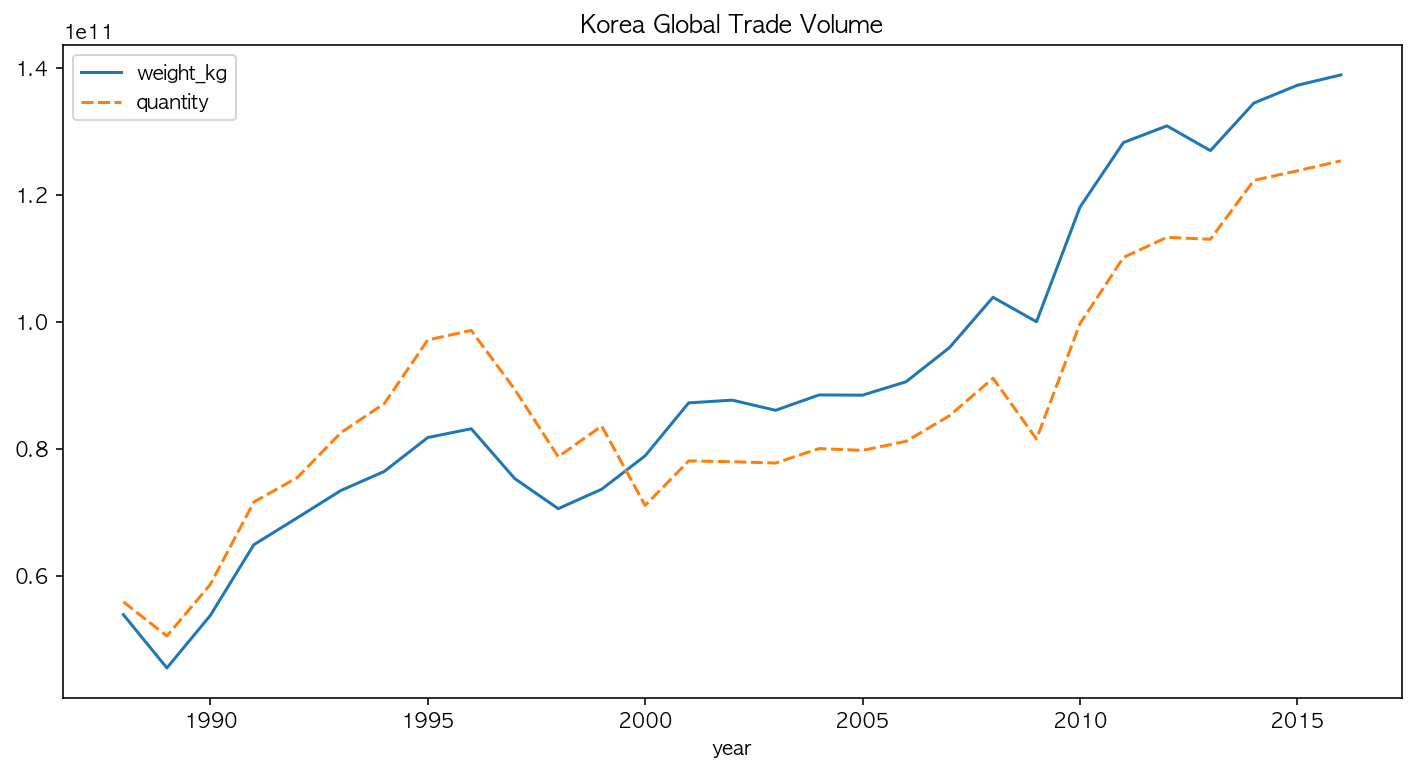

In [5]:
fig, ax = plt.subplots(figsize=(12,6))
ax = sns.lineplot(data = w_q)
ax.set_title('Korea Global Trade Volume')


From the plot, we can see Korea global trade had increased from 1990 to 2015

In [8]:
kr_i = kr_df[(kr_df.flow == 'Import') & (kr_df.comm_code!= 'TOTAL')].groupby(['year'],as_index=False)['trade_usd'].agg('sum')
kr_e = kr_df[(kr_df.flow == 'Export') & (kr_df.comm_code!= 'TOTAL')].groupby(['year'],as_index=False)['trade_usd'].agg('sum')

trace1 = go.Bar(
                x = kr_i.year,
                y = kr_i.trade_usd,
                name = "Korea Import",
                marker = dict(color = 'rgba(31, 119, 180, 0.8)'),
)

trace2 = go.Bar(
               x = kr_e.year,
                y = kr_e.trade_usd,
                name = "Korea Export",
                marker = dict(color = 'rgba(255, 127, 14, 0.8)'),
)
data = [trace1, trace2]
layout = {
    'xaxis': {'title': 'Year 1992-2016'},
    'yaxis': {'title': 'Trade of Import & Export in Korea (USD)'},
    'barmode': 'group',
    'title': 'Import and Export in Korea'
}
fig = go.Figure(data = data, layout = layout)
iplot(fig)

After entering 21st century, Korea's import and export trade has shown explosive growth.

#### Korea Import 1995 vs 2016

In [12]:
temp = kr_df[(kr_df.year==1995) & (kr_df.flow=='Import')].sort_values(by="trade_usd",  ascending=False).iloc[1:11, :]
kr_1995i = temp.sort_values(by="trade_usd",  ascending=True)
trace1 = go.Bar(
                x = kr_1995i.trade_usd,
                y = kr_1995i.commodity,
                marker = dict(color = 'rgba(0,107,164, 0.8)'),
                orientation = 'h'
)


data = [trace1]
layout = {
#     'xaxis': {'title': 'Trade in USD'},
    'yaxis': {'automargin':True,},
    'title': "Top 10 Commodities in Korea Import Trade (USD), 1995"
}
fig = go.Figure(data = data, layout = layout)
iplot(fig)

temp1 = kr_df[(kr_df.year==2016) & (kr_df.flow=='Import')].sort_values(by="trade_usd",  ascending=False).iloc[1:11, :]
kr_2016i = temp1.sort_values(by="trade_usd",  ascending=True)
trace1 = go.Bar(
                x = kr_2016i.trade_usd,
                y = kr_2016i.commodity.tolist(),
                marker = dict(color = 'rgba(216,37,38, 0.8)'),
                orientation = 'h'
)


data = [trace1]
layout = {
#     'xaxis': {'title': 'Trade in USD'},
    'yaxis': {'automargin':True,},
    'title': "Top 10 Commodities in Korea Import Trade (USD), 2016"
}
fig = go.Figure(data = data, layout = layout)
iplot(fig)



Compared to 25 years ago, the import trade has changed a lot. In terms of the number, the import volume has increased to dozens of times or even hundreds of times 25 years ago. The demand for Iron ore, Copper Ores has increased a lot.

#### Korea Export 1995 vs 2016

In [15]:
temp = kr_df[(kr_df.year==1995) & (kr_df.flow=='Export')].sort_values(by="trade_usd",  ascending=False).iloc[1:11, :]
kr_1995e = temp.sort_values(by="trade_usd",  ascending=True)
trace1 = go.Bar(
                x = kr_1995e.trade_usd,
                y = kr_1995e.commodity,
                marker = dict(color = 'rgba(255,152,150, 0.8)'),
                orientation = 'h'
)


data = [trace1]
layout = {
#     'xaxis': {'title': 'Trade in USD'},
    'yaxis': {'automargin':True,},
    'title': "Top 10 Commodities in Korea Export Trade (USD), 1995"
}
fig = go.Figure(data = data, layout = layout)
iplot(fig)

temp1 = kr_df[(kr_df.year==2016) & (kr_df.flow=='Export')].sort_values(by="trade_usd",  ascending=False).iloc[1:11, :]
kr_2016e = temp1.sort_values(by="trade_usd",  ascending=True)
trace1 = go.Bar(
                x = kr_2016e.trade_usd,
                y = kr_2016e.commodity,
                marker = dict(color = 'rgba(227,119,19, 0.8)'),
                orientation = 'h'
)


data = [trace1]
layout = {
#     'xaxis': {'title': 'Trade in USD'},
    'yaxis': {'automargin':True,},
    'title': "Top 10 Commodities in Korea Export Trade (USD), 2016"
}
fig = go.Figure(data = data, layout = layout)
iplot(fig)

Korea export continuously Tankers, Cargo vessels, toys, Floating docks

### Korea vs World

In [16]:
kr_trade = kr_df[kr_df.comm_code!= 'TOTAL'].groupby(['year'],as_index=False)['trade_usd'].agg('sum')
wd_trade = df[(df.year >1991) & (df.comm_code!= 'TOTAL')].groupby(['year'],as_index=False)['trade_usd'].agg('sum')

trace0 = {
    'x': kr_trade.year,
    'y': kr_trade.trade_usd,
    'name': "Korea",
    'type': 'bar',
    'marker': {'color':'rgba(129, 239, 208, 0.8)'}
}
trace1 = {
    'x': wd_trade.year,
    'y': wd_trade.trade_usd,
    'name': "World",
    'type': 'bar',
    'marker': {'color':'rgba(255, 171, 202, 0.8)'}
}

data = [trace0, trace1]
layout = {
    'xaxis': {'title': 'Year 1992-2016'},
    'yaxis': {'title': 'Value of Trade in USD'},
    'barmode': 'relative',
    'title': 'World vs Korea: Value of Trade'
};
fig = go.Figure(data = data, layout = layout)
iplot(fig)

# ratio
trace3 = go.Scatter(
                    x = kr_trade.year,
                    y = kr_trade.trade_usd/wd_trade.trade_usd*100,
                    mode = "lines+markers",
                    name = "Ratio of China/World",
                    marker = dict(color = 'rgba(245, 150, 104, 0.8)')
)
data2 = [trace3]
layout2 = dict(title = 'Percentage of Korea Trade in World Trade (%)',
              xaxis= dict(title= 'Year 1992-2016',ticklen= 5,zeroline= False),
              yaxis = {'title': 'Percentage (%)'}
 )
fig2 = dict(data = data2, layout = layout2)
iplot(fig2)

#### Korea vs China Vs Japan

In [18]:
cn_trade = df[(df.country_or_area == "China") & (df.comm_code!= 'TOTAL')].groupby(['year'],as_index=False)['trade_usd'].agg('sum')
jp_trade = df[(df.country_or_area == "Japan") & (df.comm_code!= 'TOTAL')].groupby(['year'],as_index=False)['trade_usd'].agg('sum')

kr_1992 = int(kr_trade[kr_trade.year==1992].iloc[0][1])
cn_1992 = int(cn_trade[cn_trade.year==1992].iloc[0][1])
jp_1992 = int(jp_trade[jp_trade.year==1992].iloc[0][1])
ot_1992 = int(wd_trade[wd_trade.year==1992].iloc[0][1]) - kr_1992 - cn_1992 - jp_1992

kr_2016 = int(kr_trade[kr_trade.year==2016].iloc[0][1])
cn_2016 = int(cn_trade[cn_trade.year==2016].iloc[0][1])
jp_2016 = int(jp_trade[jp_trade.year==2016].iloc[0][1])
ot_2016 = int(wd_trade[wd_trade.year==2016].iloc[0][1]) - kr_2016 - cn_2016 - jp_2016

labels = ['Korea','China','Japan','Others']
colors = ['#f18285', '#86e48f', '#e8a2d8', '#fff76e']

#####
trace = go.Pie(labels=labels, values=[kr_1992, cn_1992, jp_1992, ot_1992],
               marker=dict(colors=colors,  line=dict(color='#000', width=2)) )
layout = go.Layout(
    title='1992 Import & Export Trade in USD',
)
fig = go.Figure(data=[trace], layout=layout)
iplot(fig, filename='basic_pie_chart')

######
trace1 = go.Pie(labels=labels, values=[kr_2016, cn_2016, jp_2016, ot_2016],
               marker=dict(colors=colors,  line=dict(color='#000', width=2)) )
layout1 = go.Layout(
    title='2016 Import & Export Trade in USD',
)

fig1 = go.Figure(data=[trace1], layout=layout1)
iplot(fig1, filename='basic_pie_chart1')

During 25 years, the ratio of China's trade volume has increased a lot in the world. The rapid development of China's economy is inseparable from China's timely industrial revolution and the transformation of agriculture into industrialization. However, the ratio of Korea's trade volume has decreased in 2016 rather than in 1992.